In [84]:
import os 
import json 
import numpy as np
import pandas as pd 

In [85]:
Home = os.getcwd()
Graphs_Folder = os.path.join(Home,'Graph')

try:
    os.mkdir(Graphs_Folder)
except:
    print('Graph Folder Already there')

Top_folder = os.path.join(Home,'Top Vals')
Top_folder_prefix = '_peak_values.csv'
try:
    os.mkdir(Top_folder)
except:
    print('Top vals graph already there')

AA_folder = os.path.join(Home,'Aggregated Average')

try:
    os.mkdir(AA_folder)
except:
    print('Aggregated Average is already there')
    
main = os.path.join(Home,'Main_Result')
main_files = [ os.path.join(main,i) for i in os.listdir(main) if i != 'Base.csv' and i != 'Avg.csv'  and i.endswith('.csv')]

supp = os.path.join(Home,'Supplementary_Result')

Graph Folder Already there
Top vals graph already there


In [86]:
def Supp_Itr(name):
    return os.path.join(supp,f'{name}_Iterations.svg')

def Supp_para(name):
    return os.path.join(supp,f'{name}_Parameter.csv')

def Supp_eng(name):
    return os.path.join(supp,f'{name}_Energy_Distribution.csv')

In [87]:
def Find_val_eng(name,keys):
    eng_file = Supp_eng(name=name)
    df = pd.read_csv(eng_file,index_col=[0])
    #print(df.columns)
    #print(keys)
    index_lst = [ int(i[4:]) for i in keys]
    #print(index_lst)
    new_df = pd.DataFrame(columns=df.columns)
    for i in index_lst:
        new_df.loc[len(new_df)] = df.loc[i]
        # 'Time Taken(s)', 'Total Power(J)',
        new_df['Power Consumption (w)'] = new_df['Total Power(J)']/new_df['Time Taken(s)']
        #mean_total_eng = np.mean(new_df['Total Power(J)'])
    return new_df

In [88]:
TOP_vals = 10

for curr_file in main_files:
    df = pd.read_csv(curr_file,index_col=[0])
    df = df.sort_values(by='Energy Used (J)',ascending=True)
    df = df.sort_values(by='Accuracy',ascending=False)
    df = df[:TOP_vals]

    Algo_Name = os.path.basename(curr_file)
    Algo_Name = Algo_Name.split('.csv')[0]
    df = Find_val_eng(Algo_Name,df['ID'])
    df.to_csv(os.path.join(Top_folder,f'{Algo_Name}{Top_folder_prefix}'))

In [98]:
list(pd.read_csv(top_lst[0],index_col=[0]).columns)[1:]


['Time Taken(s)',
 'Total Power(J)',
 'CPU(J)',
 'Monitor(J)',
 'Disk(J)',
 'Base(J)',
 'Power Consumption (w)']

In [122]:
top_lst = [ os.path.join(Top_folder,i) for i in os.listdir(Top_folder) if i.endswith(Top_folder_prefix) ]
new_df = pd.DataFrame(columns= ['Algorithm'] + list(pd.read_csv(top_lst[0],index_col=[0]).columns)[1:])

for i in top_lst:
    df = pd.read_csv(i,index_col=[0])
    lst = [os.path.basename(i).split(Top_folder_prefix)[0]] 
    col_lst = list(df.columns)
    for i in range(1,len(col_lst)):
        lst.append(np.mean(df[col_lst[i]]))

    new_df.loc[len(new_df)] = lst

new_df.to_csv(f'{os.path.join(AA_folder, os.path.basename(AA_folder))}.csv')

In [123]:
new_df

,Algorithm,Time Taken(s),Total Power(J),CPU(J),Monitor(J),Disk(J),Base(J),Power Consumption (w)
0,Bat,239.0,792.46,443.18,0.0,0.01,358.50,3.269912
1,Camel Algorithm,242.5,779.44,426.63,0.0,0.09,363.75,3.224673
2,Cuckoo Search,216.8,700.11,384.29,0.0,0.01,325.20,3.231545
3,Fire Fly,261.1,827.82,447.29,0.0,0.00,391.65,3.176343
4,Particle Swarm,96.4,317.35,176.89,0.0,0.04,144.60,3.296733


Index(['Total Power(J)', 'CPU(J)', 'Base(J)', 'Disk(J)', 'Monitor(J)'], dtype='object')


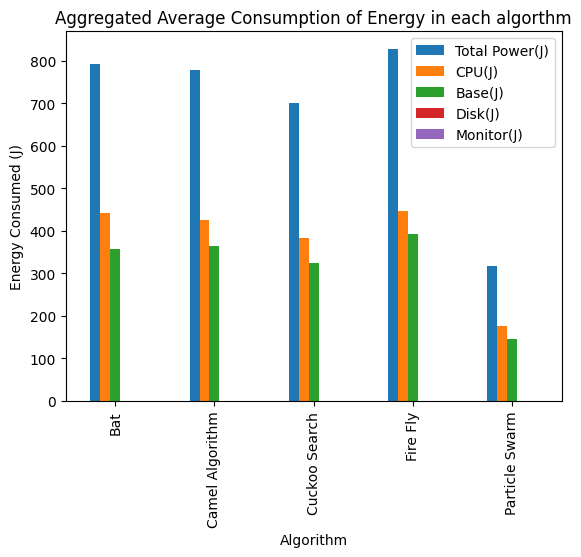

In [133]:
from matplotlib import pyplot as plt 

plot_df = new_df.drop(columns=['Power Consumption (w)','Time Taken(s)','Algorithm'])
plot_df = plot_df.loc[:,['Total Power(J)', 'CPU(J)', 'Base(J)', 'Disk(J)', 'Monitor(J)']]

plot_df.index = new_df['Algorithm']
plot_df.plot(kind="bar")
plt.title('Aggregated Average Consumption of Energy in each algorthm')
plt.xlabel('Algorithm')
plt.ylabel('Energy Consumed (J)')
print(plot_df.columns)
plt.savefig(f'{os.path.join(AA_folder, os.path.basename(AA_folder))} sector.svg')
plt.show()

Index(['Bat', 'Camel Algorithm', 'Cuckoo Search', 'Fire Fly',
       'Particle Swarm'],
      dtype='object', name='Algorithm')


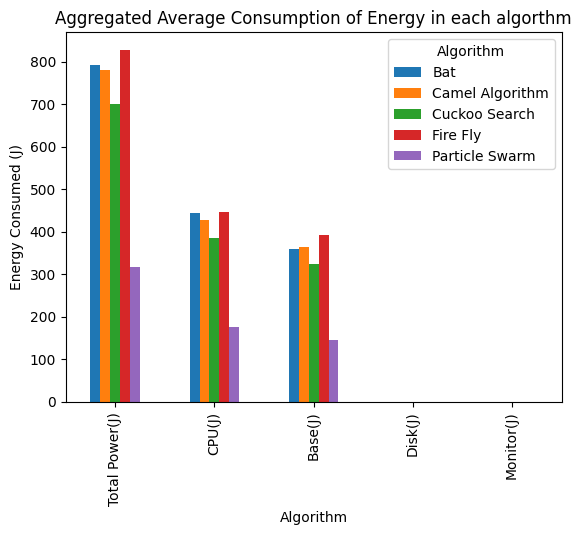

In [134]:
from matplotlib import pyplot as plt 

plot_df = new_df.drop(columns=['Power Consumption (w)','Time Taken(s)','Algorithm'])
plot_df = plot_df.loc[:,['Total Power(J)', 'CPU(J)', 'Base(J)', 'Disk(J)', 'Monitor(J)']]

plot_df.index = new_df['Algorithm']
plot_df = plot_df.T
plot_df.plot(kind="bar")
plt.title('Aggregated Average Consumption of Energy in each algorthm')
plt.xlabel('Algorithm')
plt.ylabel('Energy Consumed (J)')
print(plot_df.columns)
plt.savefig(f'{os.path.join(AA_folder, os.path.basename(AA_folder))} algo.svg')
plt.show()